In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)


In [9]:
df_imdb = pd.read_csv('clean_imdb.csv')

df_imdb

,review,split,label,movie_id,reviewer_rating,primary_title,is_adult,start_year,runtime_minutes,genres
0,"I don't know where to begin, so I'll begin wit...",train,Negative,tt0331834,4.0,Alive,0,2002.0,119.0,"Action,Drama,Horror"
1,"I'll keep this short, as I know I don't need t...",train,Negative,tt0331834,3.0,Alive,0,2002.0,119.0,"Action,Drama,Horror"
2,Having seen Versus previously I had high hopes...,train,Negative,tt0331834,2.0,Alive,0,2002.0,119.0,"Action,Drama,Horror"
3,I really tried to like this movie but in the e...,train,Negative,tt0331834,4.0,Alive,0,2002.0,119.0,"Action,Drama,Horror"
4,I've seen most of Ryuhei Kitamura's work and I...,train,Negative,tt0331834,4.0,Alive,0,2002.0,119.0,"Action,Drama,Horror"
...,...,...,...,...,...,...,...,...,...,...
74749,"Well, this movie, in summation, is another 1 h...",train,Unsupervised,tt0435286,NaN,Pokémon the Movie: Destiny Deoxys,0,2004.0,98.0,"Action,Adventure,Animation"
74750,This poke'mon movie is my favorite by far. It ...,train,Unsupervised,tt0435286,NaN,Pokémon the Movie: Destiny Deoxys,0,2004.0,98.0,"Action,Adventure,Animation"
74751,This is great! Thanks to computer graphics and...,train,Unsupervised,tt0435286,NaN,Pokémon the Movie: Destiny Deoxys,0,2004.0,98.0,"Action,Adventure,Animation"
74752,This movie was the type of pokemon movie I alw...,train,Unsupervised,tt0435286,NaN,Pokémon the Movie: Destiny Deoxys,0,2004.0,98.0,"Action,Adventure,Animation"


### ¿Influye la duración de las películas en la opinión que tienen las personas?

In [ ]:
df_not_null_rating = df_imdb.dropna(axis=0, subset=['reviewer_rating'])
df_unique_duration = df_not_null_rating.groupby(['runtime_minutes']).mean().round()
df_unique_duration.reset_index(inplace=True)
df_unique_duration

,runtime_minutes,reviewer_rating,is_adult,start_year
0,41.0,8.0,0.0,1943.0
1,45.0,6.0,0.0,1924.0
2,47.0,9.0,0.0,1983.0
3,48.0,10.0,0.0,1967.0
4,50.0,7.0,0.0,1998.0
...,...,...,...,...
152,263.0,1.0,0.0,1949.0
153,275.0,9.0,0.0,1979.0
154,278.0,3.0,0.0,2004.0
155,345.0,3.0,0.0,2000.0


<AxesSubplot: title={'center': 'runtime_minutes'}, xlabel='reviewer_rating'>

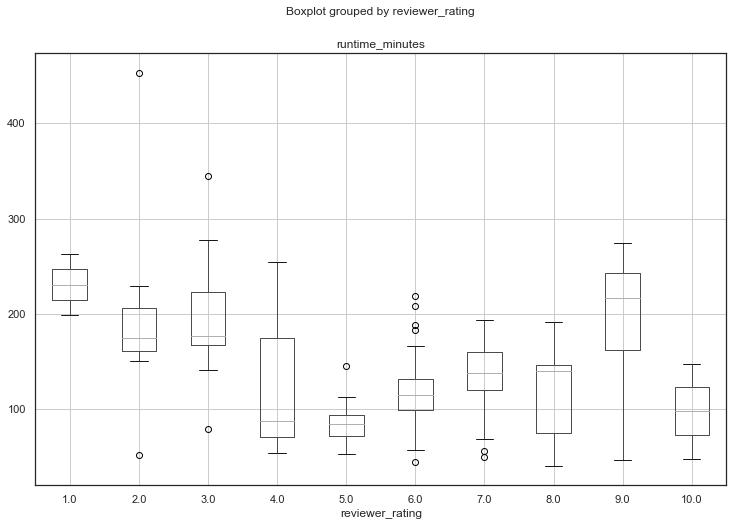

In [58]:
# Visualizar la relación entre el rating y el tiempo de duración
df_unique_duration.boxplot(column='runtime_minutes', by='reviewer_rating',figsize=(12,8))

### ¿Qué géneros tienen mejores ratings?

In [79]:
df_not_null_rating = df_imdb.dropna(axis=0, subset=['reviewer_rating'])
df_unique_genre = df_not_null_rating.groupby(['genres']).mean().round()
df_unique_genre.reset_index(inplace=True)
df_unique_genre

,genres,reviewer_rating,is_adult,start_year,runtime_minutes
0,Action,4.0,0.0,1995.0,92.0
1,"Action,Adventure",4.0,0.0,1979.0,96.0
2,"Action,Adventure,Animation",6.0,0.0,1999.0,97.0
3,"Action,Adventure,Biography",6.0,0.0,2003.0,110.0
4,"Action,Adventure,Comedy",4.0,0.0,1997.0,102.0
...,...,...,...,...,...
450,"Thriller,War",6.0,0.0,1942.0,99.0
451,"Thriller,Western",1.0,0.0,2007.0,90.0
452,War,5.0,0.0,1985.0,112.0
453,"War,Western",3.0,0.0,1968.0,125.0


In [96]:
simple_genres =[]
for genre in df_unique_genre['genres']:
    for simple_genre in genre.split(','):
        if simple_genre not in simple_genres:
            simple_genres.append(simple_genre)
simple_genres.sort()

genres_rating = {}
for genre in simple_genres:
    ratings = []
    for i in range(len(df_unique_genre)):
        if genre in df_unique_genre['genres'][i]:
            ratings.append(df_unique_genre['reviewer_rating'][i])
    genres_rating[genre] = (sum(ratings) / len(ratings)).round(2)

genres_rating


{'Action': 4.72,
 'Adult': 3.57,
 'Adventure': 5.09,
 'Animation': 5.43,
 'Biography': 5.42,
 'Comedy': 5.1,
 'Crime': 5.15,
 'Documentary': 5.81,
 'Drama': 5.38,
 'Family': 5.35,
 'Fantasy': 4.98,
 'Film-Noir': 4.21,
 'History': 5.73,
 'Horror': 3.97,
 'Music': 5.59,
 'Musical': 6.03,
 'Mystery': 4.96,
 'News': 2.0,
 'Romance': 5.05,
 'Sci-Fi': 4.6,
 'Short': 8.0,
 'Sport': 5.61,
 'Thriller': 4.55,
 'War': 5.66,
 'Western': 4.59}

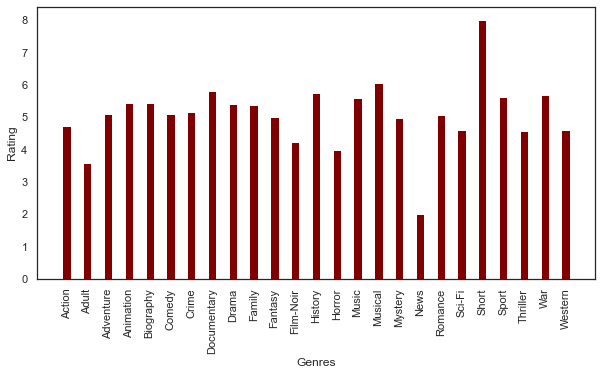

In [100]:
# Visualizar la relación entre el rating y el género
genres = list(genres_rating.keys())
rating = list(genres_rating.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(genres, rating, color ='maroon',
        width = 0.4)

plt.xlabel("Genres")
plt.xticks(rotation=90)
plt.ylabel("Rating")
plt.show()

Se puede observar que el género de "Cortos" es el que tiene una mayor puntuación, mientras que el género de "Noticias" tiene una puntuación muy baja.